## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Clear and concise write-up with clear well-documented figures

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [53]:
# I chose a camera data set!
# Let's import our data!
# Link to Kaggle dataset: https://www.kaggle.com/crawford/1000-cameras-dataset
df = pd.read_csv('camera_dataset.csv')
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024,640,0,38,114,70,40.0,4.0,420.0,95.0,179
1,Agfa ePhoto 1680,1998,1280,640,1,38,114,50,0.0,4.0,420.0,158.0,179
2,Agfa ePhoto CL18,2000,640,0,0,45,45,0,0.0,2.0,0.0,0.0,179
3,Agfa ePhoto CL30,1999,1152,640,0,35,35,0,0.0,4.0,0.0,0.0,269
4,Agfa ePhoto CL30 Clik!,1999,1152,640,0,43,43,50,0.0,40.0,300.0,128.0,1299


In [54]:
print(df.shape)

(1038, 13)


In [55]:
# Check for nulls
print(df.isnull().sum())

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64


We have some null values in our data set. Since they are few and numerical, let's replace them with average in that row.

In [56]:
df['Macro focus range'].fillna((df['Macro focus range'].mean()), inplace=True)
df['Storage included'].fillna((df['Storage included'].mean()), inplace=True)
df['Weight (inc. batteries)'].fillna((df['Weight (inc. batteries)'].mean()), inplace=True)
df['Dimensions'].fillna((df['Dimensions'].mean()), inplace=True)

In [57]:
print(df.isnull().sum())

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64


Our data now has no null values!!

In [58]:
print(df.describe())

       Release date  Max resolution  ...   Dimensions        Price
count   1038.000000     1038.000000  ...  1038.000000  1038.000000
mean    2003.590559     2474.672447  ...   105.363417   457.384393
std        2.724755      759.513608  ...    24.239353   760.452918
min     1994.000000        0.000000  ...     0.000000    14.000000
25%     2002.000000     2048.000000  ...    92.000000   149.000000
50%     2004.000000     2560.000000  ...   101.000000   199.000000
75%     2006.000000     3072.000000  ...   115.000000   399.000000
max     2007.000000     5616.000000  ...   240.000000  7999.000000

[8 rows x 12 columns]


In [59]:
# Let's create a correlation matrix
print(df.corr())

                         Release date  Max resolution  ...  Dimensions     Price
Release date                 1.000000        0.788682  ...   -0.248594 -0.023249
Max resolution               0.788682        1.000000  ...   -0.000057  0.183202
Low resolution               0.745426        0.838381  ...   -0.105303  0.154179
Effective pixels             0.790742        0.953949  ...   -0.004071  0.189149
Zoom wide (W)               -0.070643       -0.372648  ...   -0.486452 -0.459236
Zoom tele (T)                0.192601        0.069073  ...   -0.118169 -0.189377
Normal focus range          -0.074297       -0.199703  ...   -0.237094 -0.273974
Macro focus range           -0.252960       -0.346610  ...   -0.090333 -0.127652
Storage included             0.212851        0.166034  ...   -0.114280 -0.103033
Weight (inc. batteries)     -0.259386        0.106557  ...    0.677885  0.464700
Dimensions                  -0.248594       -0.000057  ...    1.000000  0.264222
Price                       

We see a low correlation between price and max resolution (our question) and a higher correlation for Release date and max resolution. This makes sense, so we will try a model for both.

This implies that price doesn't impact the max resolution, but resolution increases over time.

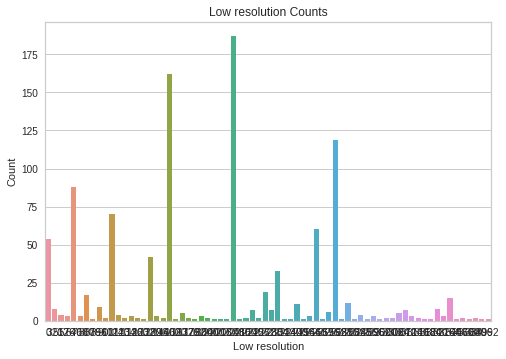

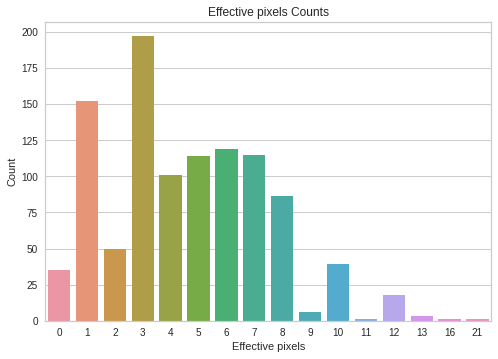

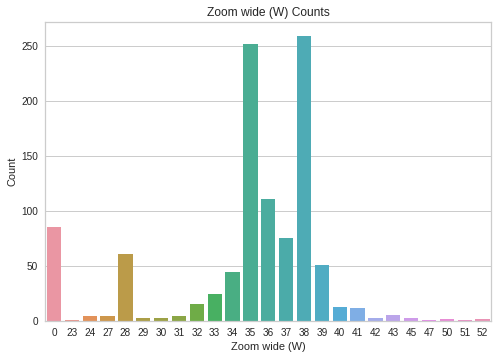

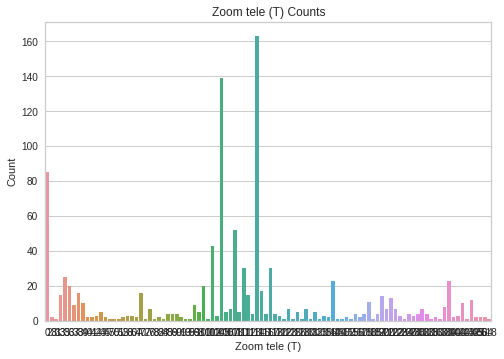

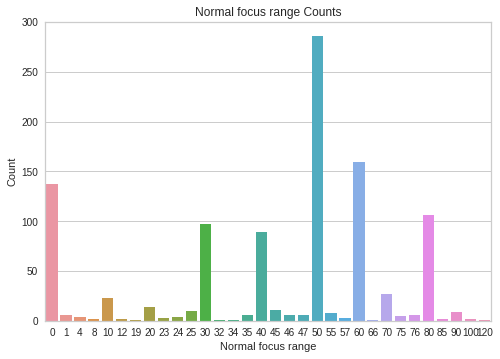

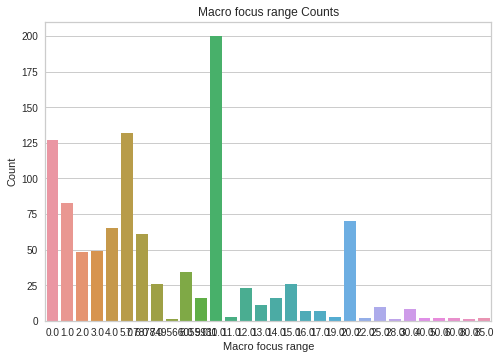

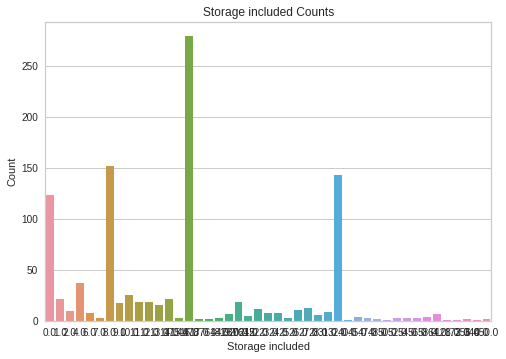

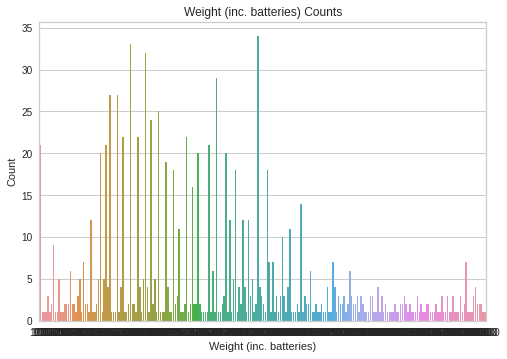

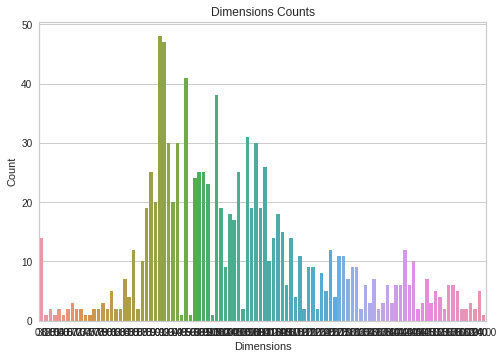

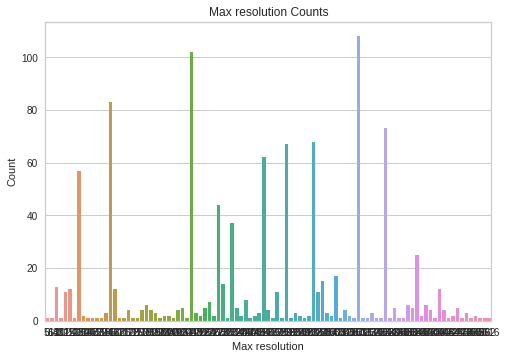

In [60]:
# Let's plot the counts of all the factors we're interested in
# Variables
plt.figure(1)
sb.countplot(x='Low resolution', data=df)
plt.ylabel('Count')
plt.title('Low resolution Counts')

plt.figure(2)
sb.countplot(x='Effective pixels', data=df)
plt.ylabel('Count')
plt.title('Effective pixels Counts')

plt.figure(3)
sb.countplot(x='Zoom wide (W)', data=df)
plt.ylabel('Count')
plt.title('Zoom wide (W) Counts')

plt.figure(4)
sb.countplot(x='Zoom tele (T)', data=df)
plt.ylabel('Count')
plt.title('Zoom tele (T) Counts')

plt.figure(5)
sb.countplot(x='Normal focus range', data=df)
plt.ylabel('Count')
plt.title('Normal focus range Counts')

plt.figure(6)
sb.countplot(x='Macro focus range', data=df)
plt.ylabel('Count')
plt.title('Macro focus range Counts')

plt.figure(7)
sb.countplot(x='Storage included', data=df)
plt.ylabel('Count')
plt.title('Storage included Counts')

plt.figure(8)
sb.countplot(x='Weight (inc. batteries)', data=df)
plt.ylabel('Count')
plt.title('Weight (inc. batteries) Counts')

plt.figure(9)
sb.countplot(x='Dimensions', data=df)
plt.ylabel('Count')
plt.title('Dimensions Counts')

plt.figure(10)
sb.countplot(x='Max resolution', data=df)
plt.ylabel('Count')
plt.title('Max resolution Counts')

plt.show()

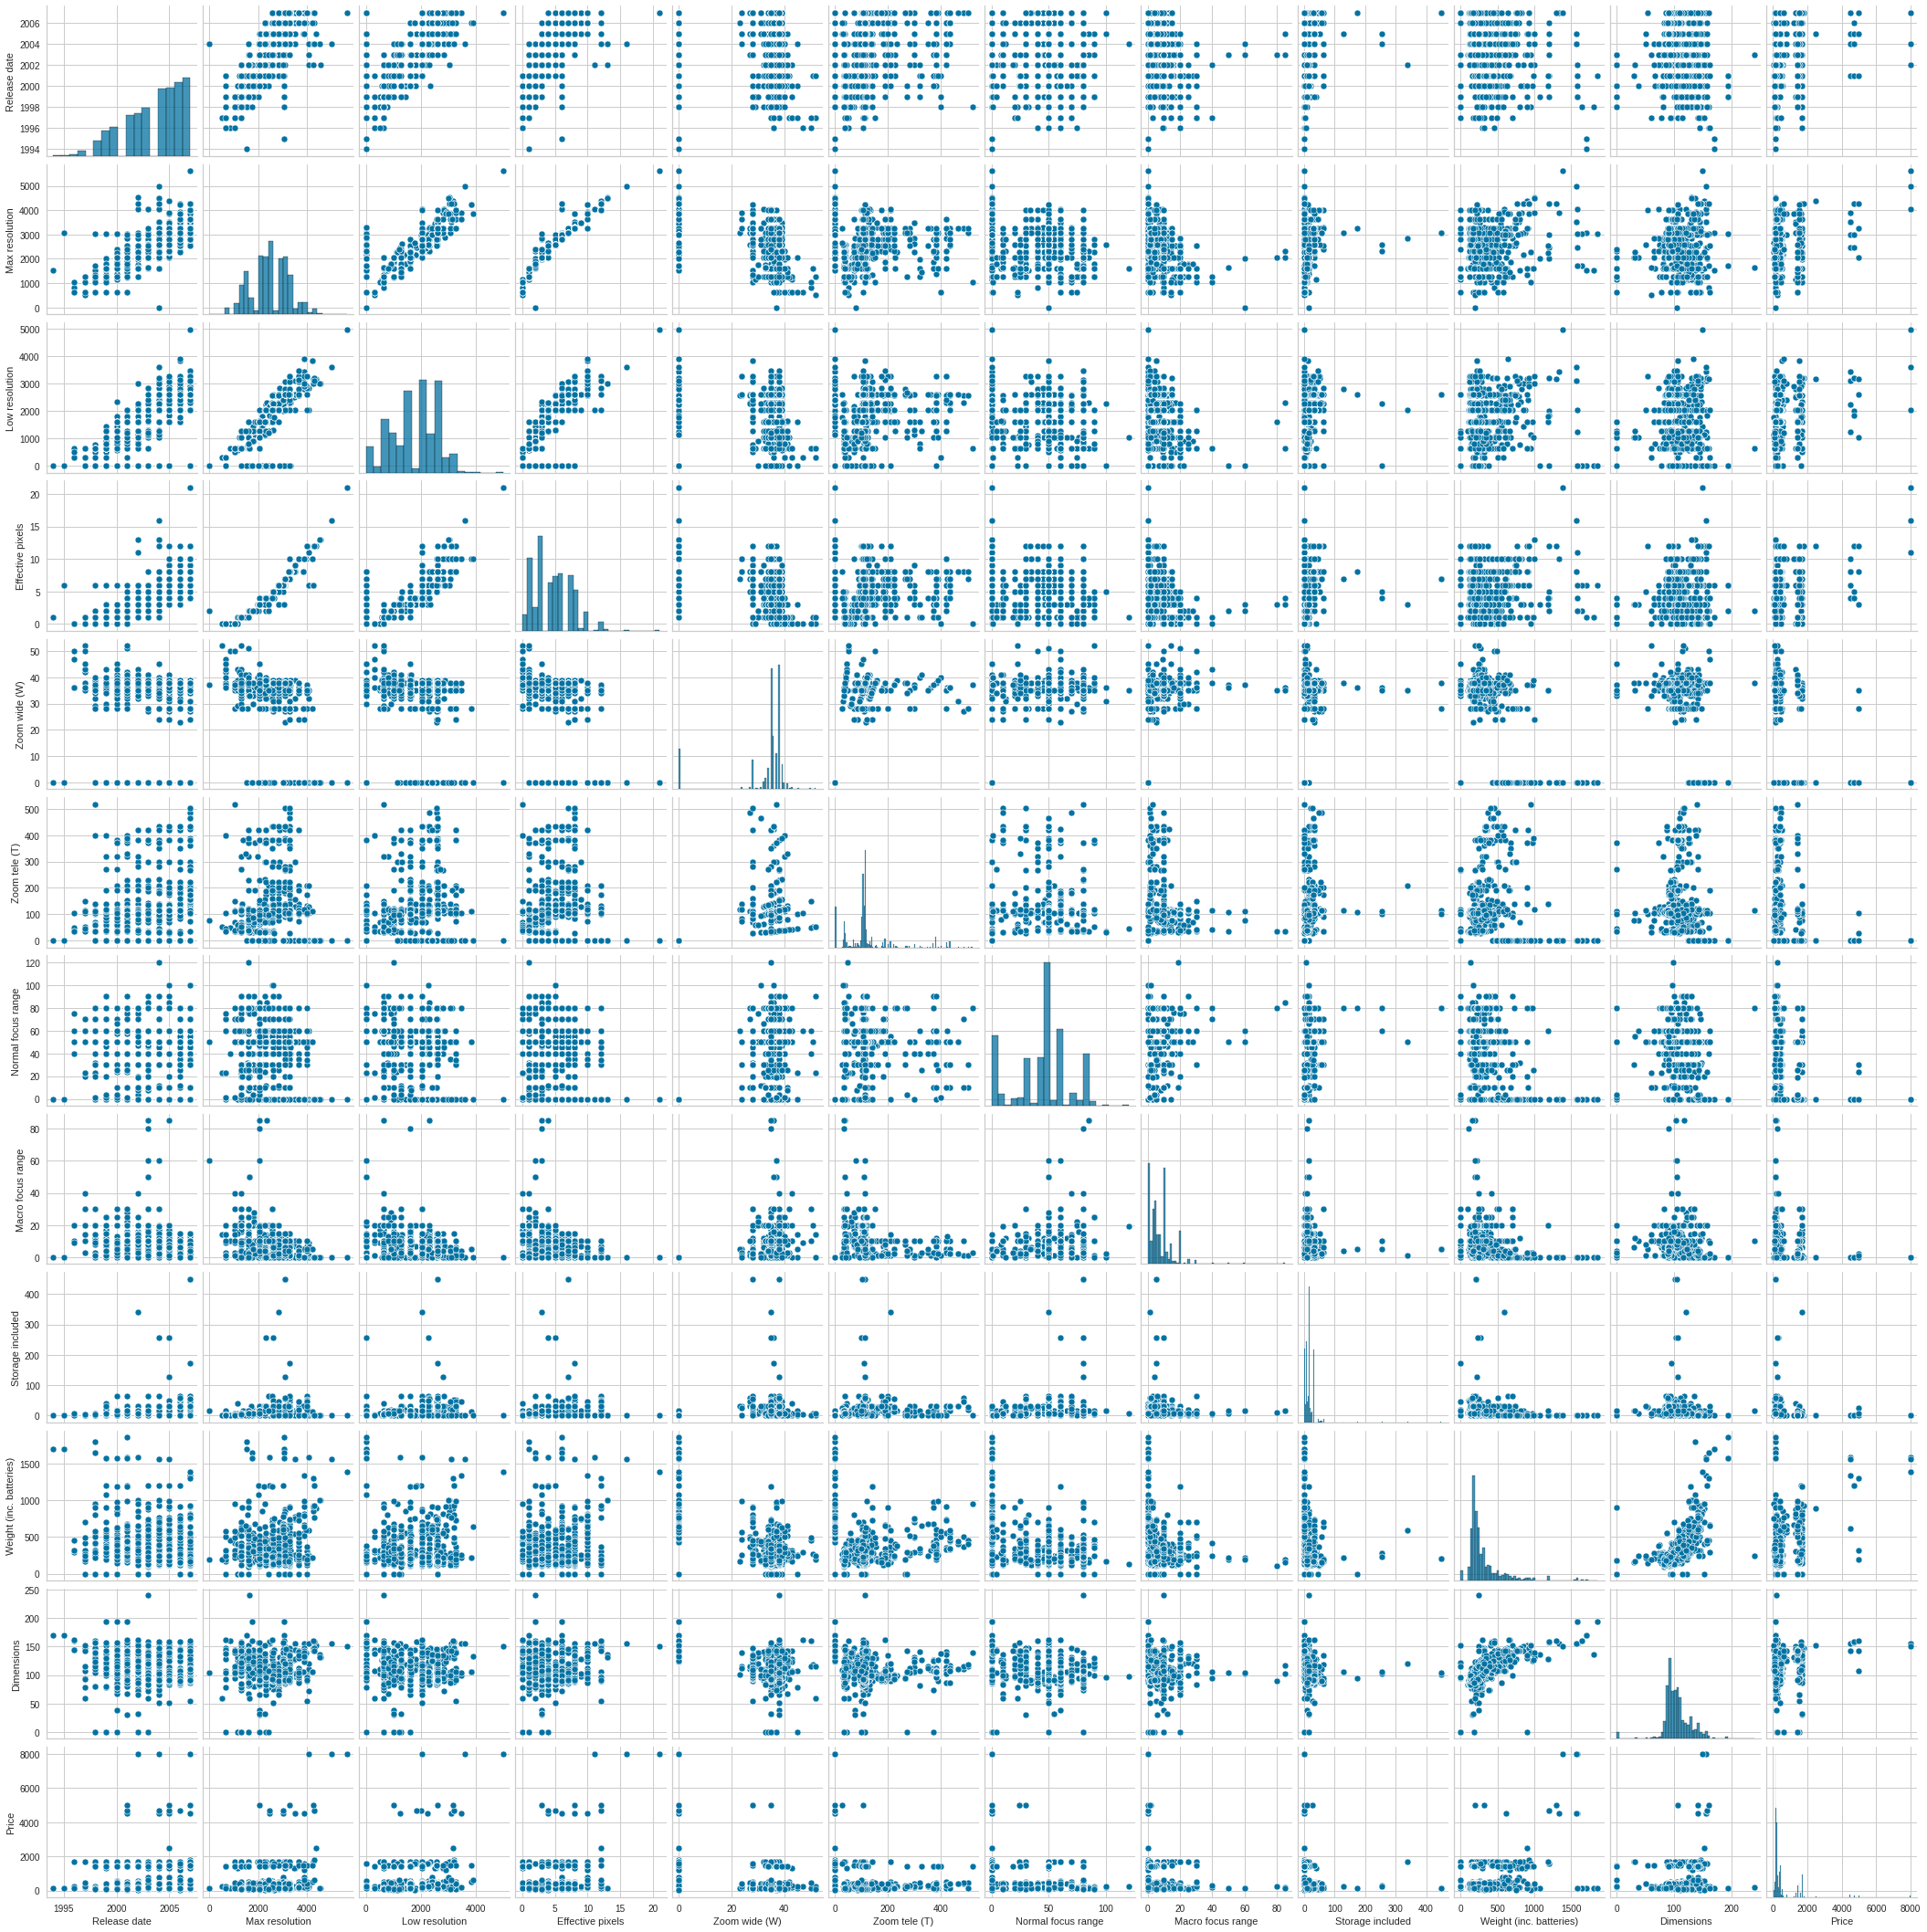

In [61]:
# Let's create a scatterplot matrix
sb.pairplot(df)
plt.show()

In [62]:
# Our data looks clean, so let's begin our machine learning model
# Our first model will be a linear regression model that will predict the max resolution using price.
# Max resolution is the display of the greatest number of pixels a camera can display
# The higher the max resolution, the better your photos can be

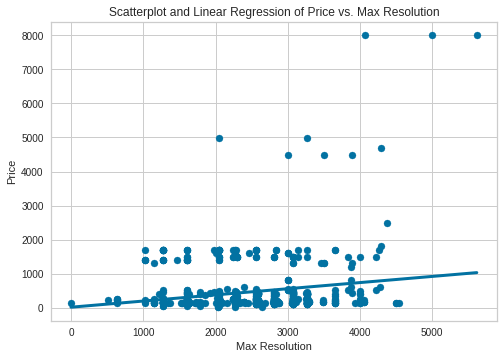

In [63]:
# Let's create our model:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['Max resolution'].values
y = df['Price'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

#Let's fit a linear regression model!
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Let's draw the regression line, we will predict y for every value of X
x_range = np.linspace(min(X_train),max(X_train))
x_range = x_range.reshape(-1,1)
y_predictions = linear_model.predict(x_range)

# Draw the scatter plot with training data
plt.scatter(X_train, y_train)

plt.plot(x_range,y_predictions, linewidth=3)
plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Price')
plt.show()

There are some outliers in price. Let's display the description statistics of these variables alone.

In [64]:
data = df[['Max resolution', 'Price']]
print(data.describe())

       Max resolution        Price
count     1038.000000  1038.000000
mean      2474.672447   457.384393
std        759.513608   760.452918
min          0.000000    14.000000
25%       2048.000000   149.000000
50%       2560.000000   199.000000
75%       3072.000000   399.000000
max       5616.000000  7999.000000


Let's also display our ResidualsPlot for test and training data

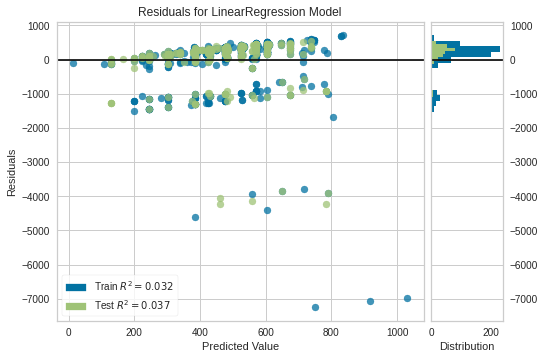

In [65]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [66]:
# Get metrics:
from sklearn import metrics
y_pred = linear_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 409.02807644641183
Mean Squared Error: 512382.93875490036
R^2: 0.03748376104000162


Let's try to find a model where that R^2 increases!

In [67]:
# Let's try another model. 
# Let's try to shrink the coefficients towards zero
# Use lasso model (Least Absolute Shrinkage and Selection Operator)

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Let's pick a good value for alpha
alpha_space = np.logspace(-4, 0, 50)
model_scores = []

lasso_model = Lasso(normalize=True)
for alpha in alpha_space:
    lasso_model.alpha = alpha
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(alpha_space[best_alpha_index])

1.0


In [68]:
# Let's use this in our linear regression model!
# We are making a Lasso model based on the alpha predicted above

X = df['Max resolution'].values
y = df['Price'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

alpha_user = 1
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print('Lasso:', lasso_coef)
print('Original Model:', linear_model.coef_)

Lasso: [0.14561316]
Original Model: [[0.18091444]]


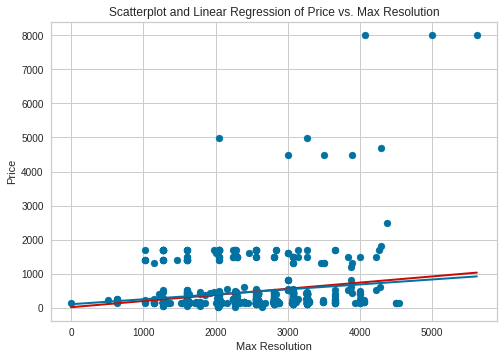

In [69]:
# Let's plot these regressions together!
plt.scatter(X_train, y_train)
# Original Regression Line
plt.plot(x_range,y_predictions, linewidth=2, color = 'r')

# Lasso Regression Line
x_range_lasso = np.linspace(min(X_train),max(X_train))
x_range_lasso = x_range.reshape(-1,1)
y_predictions_lasso = lasso_model.predict(x_range_lasso)
plt.plot(x_range_lasso,y_predictions_lasso, linewidth=2, color = 'b')

plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Price')
plt.show()

This implies that camera prices don't really dertermine the max resolution of a camera, but there is a slight increase (this is seen in the slope of the regressions).

In [70]:
# Get metrics for lasso:
from sklearn import metrics
y_pred = lasso_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 408.09211474184633
Mean Squared Error: 513419.60009748593
R^2: 0.03553638281744531


Has a lower R^2!

In [71]:
from sklearn.linear_model import Ridge

# Let's also try a ridge regression!
# Let's pick alpha

alpha_space = np.logspace(-4, 0, 50)
model_scores = []

ridge_model = Ridge(normalize=True)
for alpha in alpha_space:
    ridge_model.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_model,X_train,y_train,cv=10)
    model_scores.append(np.mean(ridge_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(alpha_space[best_alpha_index])

1.0


In [72]:
alpha_user = 1
ridge_model = Ridge(alpha= alpha_user, normalize=True)
ridge_model.fit(X_train,y_train)
ridge_coef = ridge_model.coef_
print('Ridge:', ridge_coef)
# Compare coef with both other models
print('Lasso:', lasso_coef)
print('Original Model:', linear_model.coef_)

Ridge: [[0.09045722]]
Lasso: [0.14561316]
Original Model: [[0.18091444]]


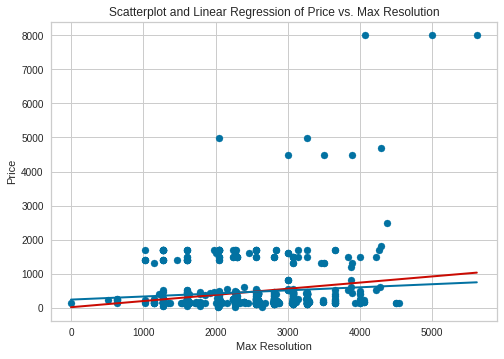

In [73]:
# Let's now add this to our model

plt.scatter(X_train, y_train)
# Original Regression Line
plt.plot(x_range,y_predictions, linewidth=2, color = 'r')

# Ridge Regression Line
x_range_ridge = np.linspace(min(X_train),max(X_train))
x_range_ridge = x_range.reshape(-1,1)
y_predictions_ridge = ridge_model.predict(x_range_ridge)
plt.plot(x_range_ridge,y_predictions_ridge, linewidth=2, color = 'b')

plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Price')
plt.show()

In [74]:
# Get metrics for ridge:
from sklearn import metrics
y_pred = ridge_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 408.1292559315232
Mean Squared Error: 517842.0186733036
R^2: 0.027228827329656036


Gives the lowest R^2 of all models.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


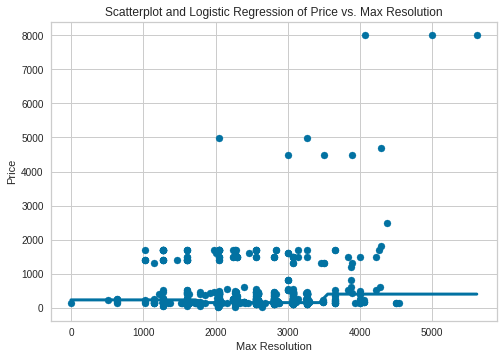

In [75]:
# Let's also make a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

X = df['Max resolution'].values
y = df['Price'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

#Let's fit a linear regression model!
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

# Let's draw the regression line, we will predict y for every value of X
x_range = np.linspace(min(X_train),max(X_train))
x_range = x_range.reshape(-1,1)
y_predictions = log_model.predict(x_range)

# Draw the scatter plot with training data
plt.scatter(X_train, y_train)

plt.plot(x_range,y_predictions, linewidth=3)
plt.title('Scatterplot and Logistic Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Price')
plt.show()

In [76]:
# Get metrics for Logistic Regression:
from sklearn import metrics
y_pred = log_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.09615384615384616


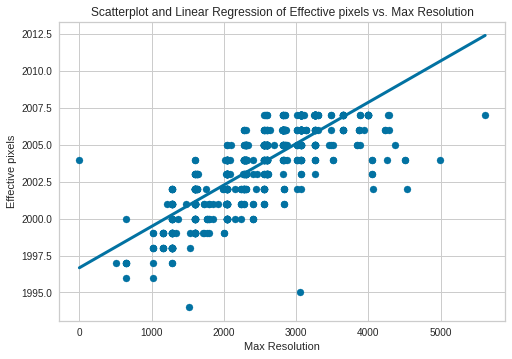

In [77]:
# I noticed that one of the higher correlations was release date and max resolution
# Let's make a linear regression model for this as well
# This makes sense since more technology increases over time
# Lets make this model just for fun!
X = df['Max resolution'].values
y = df['Release date'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

#Let's fit a linear regression model!
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Let's draw the regression line, we will predict y for every value of X
x_range = np.linspace(min(X_train),max(X_train))
x_range = x_range.reshape(-1,1)
y_predictions = linear_model.predict(x_range)

# Draw the scatter plot with training data
plt.scatter(X_train, y_train)

plt.plot(x_range,y_predictions, linewidth=3)
plt.title('Scatterplot and Linear Regression of Effective pixels vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Effective pixels')
plt.show()

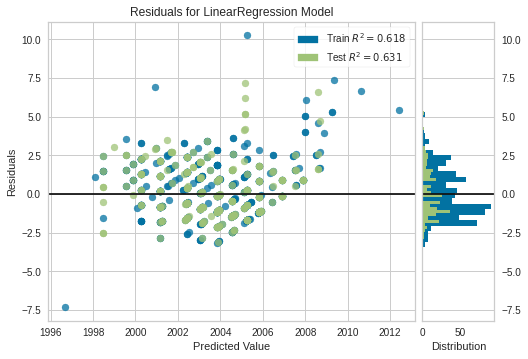

In [78]:
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

We see a much higher R^2 for both data sets and a better distribution.

Text(0, 0.5, 'Max Resolution')

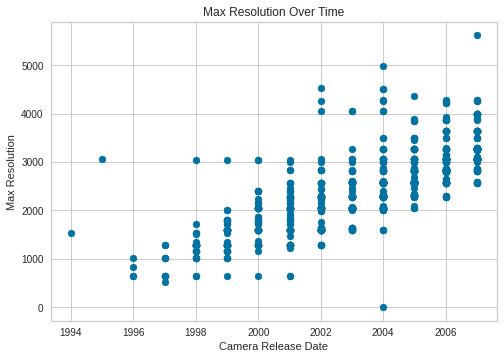

In [79]:
# Let's graph resolution over time
plt.scatter(df['Release date'], df['Max resolution'])
plt.title('Max Resolution Over Time')
plt.xlabel('Camera Release Date')
plt.ylabel('Max Resolution') 

We see a steady increase in the max resolution over time. Let's also try a Lasso and Ridge model for these.

In [80]:
# Let's try another model. 
# Let's try to shrink the coefficients towards zero
# Use lasso model (Least Absolute Shrinkage and Selection Operator)

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Let's pick a good value for alpha
alpha_space = np.logspace(-4, 0, 50)
model_scores = []

lasso_model = Lasso(normalize=True)
for alpha in alpha_space:
    lasso_model.alpha = alpha
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(alpha_space[best_alpha_index])

0.0024420530945486497


In [81]:
# Let's use this in our linear regression model!
# We are making a Lasso model based on the alpha predicted above

X = df['Max resolution'].values
y = df['Release date'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

alpha_user = 0.0024420530945486497
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print('Lasso:', lasso_coef)
print('Original Model:', linear_model.coef_)

Lasso: [0.00271555]
Original Model: [[0.00280176]]


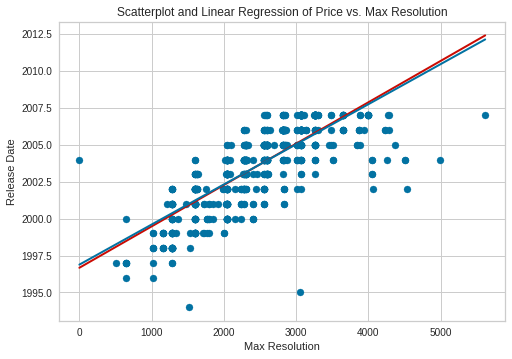

In [82]:
# Let's plot these regressions together!
plt.scatter(X_train, y_train)
# Original Regression Line
plt.plot(x_range,y_predictions, linewidth=2, color = 'r')

# Lasso Regression Line
x_range_lasso = np.linspace(min(X_train),max(X_train))
x_range_lasso = x_range.reshape(-1,1)
y_predictions_lasso = lasso_model.predict(x_range_lasso)
plt.plot(x_range_lasso,y_predictions_lasso, linewidth=2, color = 'b')

plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Release Date')
plt.show()

In [83]:
# Get metrics for lasso:
from sklearn import metrics
y_pred = lasso_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.326421547103347
Mean Squared Error: 2.7623089386660515
R^2: 0.6294487758378466


We have a higher R^2!!

In [84]:
# Let's also try Ridge!
# Let's also try a ridge regression!
# Let's pick alpha

alpha_space = np.logspace(-4, 0, 50)
model_scores = []

ridge_model = Ridge(normalize=True)
for alpha in alpha_space:
    ridge_model.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge_model,X_train,y_train,cv=10)
    model_scores.append(np.mean(ridge_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(alpha_space[best_alpha_index])

0.033932217718953266


In [85]:
alpha_user = 0.033932217718953266
ridge_model = Ridge(alpha= alpha_user, normalize=True)
ridge_model.fit(X_train,y_train)
ridge_coef = ridge_model.coef_
print('Ridge:', ridge_coef)
# Compare coef with both other models
print('Lasso:', lasso_coef)
print('Original Model:', linear_model.coef_)

Ridge: [[0.00270981]]
Lasso: [0.00271555]
Original Model: [[0.00280176]]


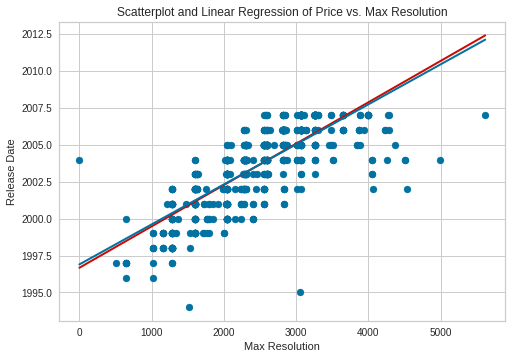

In [86]:
# Let's now add this to our model

plt.scatter(X_train, y_train)
# Original Regression Line
plt.plot(x_range,y_predictions, linewidth=2, color = 'r')

# Ridge Regression Line
x_range_ridge = np.linspace(min(X_train),max(X_train))
x_range_ridge = x_range.reshape(-1,1)
y_predictions_ridge = ridge_model.predict(x_range_ridge)
plt.plot(x_range_ridge,y_predictions_ridge, linewidth=2, color = 'b')

plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Release Date')
plt.show()

In [87]:
# Get metrics for ridge:
from sklearn import metrics
y_pred = ridge_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.3270698842196949
Mean Squared Error: 2.763490340208676
R^2: 0.6292902961755182


Slightly lower R^2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


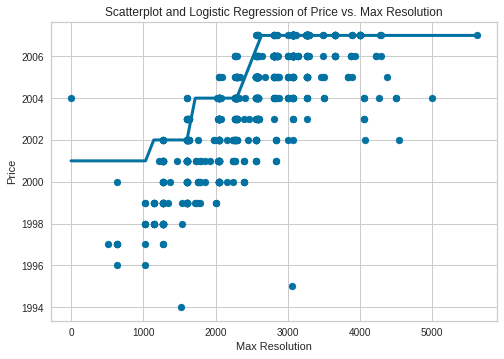

In [88]:
# Let's also make a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

X = df['Max resolution'].values
y = df['Release date'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

#Let's fit a linear regression model!
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

# Let's draw the regression line, we will predict y for every value of X
x_range = np.linspace(min(X_train),max(X_train))
x_range = x_range.reshape(-1,1)
y_predictions = log_model.predict(x_range)

# Draw the scatter plot with training data
plt.scatter(X_train, y_train)

plt.plot(x_range,y_predictions, linewidth=3)
plt.title('Scatterplot and Logistic Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Price')
plt.show()

In [89]:
# Get metrics for Logistic Reegression:
from sklearn import metrics
y_pred = log_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.2724358974358974


In [90]:
# Let's regularize the model
# Let's pick a good value for alpha
alpha_space = np.logspace(-4, 0, 50)
model_scores = []

lasso_model = Lasso(normalize=True)
for alpha in alpha_space:
    lasso_model.alpha = alpha
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    model_scores.append(np.mean(lasso_cv_scores))
  
best_alpha_index = np.argmax(model_scores)
print(alpha_space[best_alpha_index])

0.0024420530945486497


In [91]:
# We are making a Lasso model based on the alpha predicted above

X = df['Max resolution'].values
y = df['Release date'].values

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

alpha_user = 0.0024420530945486497
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_
print('Lasso:', lasso_coef)

Lasso: [0.00271555]


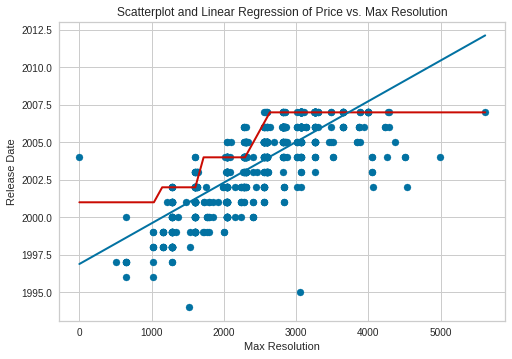

In [92]:
# Let's plot these regressions together!
plt.scatter(X_train, y_train)
# Original Regression Line
plt.plot(x_range,y_predictions, linewidth=2, color = 'r')

# Lasso Regression Line
x_range_lasso = np.linspace(min(X_train),max(X_train))
x_range_lasso = x_range.reshape(-1,1)
y_predictions_lasso = lasso_model.predict(x_range_lasso)
plt.plot(x_range_lasso,y_predictions_lasso, linewidth=2, color = 'b')

plt.title('Scatterplot and Linear Regression of Price vs. Max Resolution')
plt.xlabel('Max Resolution')
plt.ylabel('Release Date')
plt.show()